In [1]:
from fastai import *
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path

PosixPath('/home/syang/.fastai/data/imdb_sample')

In [4]:
df = pd.read_csv(path/'train.csv', header=None)
df.head()

,0,1
0,0,Un-bleeping-believable! Meg Ryan doesn't even ...
1,1,This is a extremely well-made film. The acting...
2,0,Every once in a long while a movie will come a...
3,1,Name just says it all. I watched this movie wi...
4,0,This movie succeeds at being one of the most u...


In [5]:
classes = read_classes(path/'classes.txt')
classes[0], classes[1]

('negative', 'positive')

In [6]:
data_lm = TextLMDataBunch.from_csv(path)
data_clas = TextClasDataBunch.from_csv(path, vocab=data_lm.train_ds.vocab)

Numericalizing valid.


In [73]:
learn = RNNLearner.language_model(data_lm, pretrained_model=URLs.WT103, callback_fns=SaveModel)
learn.fit(2, 1e-2)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      5.104008    4.195073    0.241997  (00:16)
2      4.841761    4.138711    0.245857  (00:16)



In [ ]:
learn.save_model()

In [11]:
learn.save('modeltest-001')

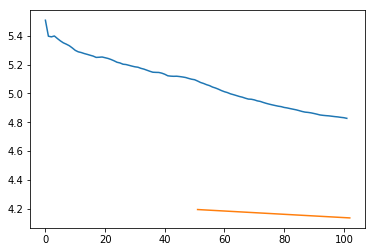

In [57]:
learn.recorder.plot_losses()

In [72]:
import datetime

@dataclass
class SaveModel(LearnerCallback):
    """Save Latest Model"""
    def __init__(self, learn:Learner):
        super().__init__(learn)
        self.model_date = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
        
    def on_epoch_end(self, epoch:int, **kwargs):
        self.learn.save(f'lyrics-{self.model_date}-{epoch:03d}')
        return False

In [69]:
import datetime
dt = datetime.date.now().strftime('%Y-%m-%d-%H-%M-%S')
dt

'2018-10-31'

In [ ]:
learn.recorder.on_epoch_end

In [67]:
x,y = next(iter(data_lm.train_dl))
example = x[:20,:10].cpu()
texts = pd.DataFrame([data_lm.train_ds.vocab.textify(l).split(' ') for l in example])
texts

,0,1,2,3,4,5,6,7,8,9
0,xxfld,protagonist,xxunk,into,occasionally,start,humor,his,the,xxunk
1,1,is,for,this,xxunk,planning,is,revenge,box,in
2,un,xxunk,a,film,in,and,the,.,office,my
3,-,her,massive,",",other,not,biggest,still,",",xxunk
4,xxunk,early,series,although,versions,filming,problem,alive,xxunk,.
5,-,life,of,having,of,until,with,",",b.,first
6,believable,as,gags,the,the,everything,the,it,demille,","
7,!,a,built,main,story,has,film,looks,stopped,the
8,meg,butcher,upon,character,.,come,.,like,doing,xxunk
9,ryan,.,gags,a,wells,down,sure,carradine,films,scene


In [63]:
x[:,-1]

tensor([  27,   11,   80,    0,  389,    0,   30,   20, 1068,    0,   27, 1487,
          61,    0,   61,    8, 1156,    2,  138,    7,    0,    0,   30,   20,
           0, 4603,   27,    3,   19,   55,   26,  191,  182,  905,  116,   30,
           7,   80,   52,   32, 5834,   48,   27,   12,  264,  333,   23,   61,
         524,  905,   61,   30,    0,   27,    4,   61,  450,    7,    2, 1517,
          61,   30,    0,   27,    4,   61,   12, 5108,   23,    6,  905,   61,
          30,    0,   27,    4,   61,  398], device='cuda:0')

In [62]:
y.reshape((78,64))[:,-1]

tensor([  11,   80,    0,  389,    0,   30,   20, 1068,    0,   27, 1487,   61,
           0,   61,    8, 1156,    2,  138,    7,    0,    0,   30,   20,    0,
        4603,   27,    3,   19,   55,   26,  191,  182,  905,  116,   30,    7,
          80,   52,   32, 5834,   48,   27,   12,  264,  333,   23,   61,  524,
         905,   61,   30,    0,   27,    4,   61,  450,    7,    2, 1517,   61,
          30,    0,   27,    4,   61,   12, 5108,   23,    6,  905,   61,   30,
           0,   27,    4,   61,  398,    7], device='cuda:0')

In [ ]:
# download_wt103_model()

In [116]:
learn = RNNLearner.language_model(data_lm, pretrained_fnames=['lstm_wt103', 'itos_wt103'], drop_mult=0.5)
# learn.load('../../interim/subset-10k/csv_test/models/10k-subset-5-epoch') # shouldn't work, as expected
# learn.fit_one_cycle(1, 1e-2)

In [64]:
with open('../data/imdb_sample/models/itos_wt103.pkl', 'rb') as f:
    aa = pickle.load(f)
aa = set(aa)
bb = data_lm.train_ds.vocab.itos
new_words = [w for w in bb if w not in aa]
new_words_id = data_lm.train_ds.vocab.numericalize(new_words)

In [67]:
new_words_id[-5:]

[5986, 5989, 5995, 5997, 5998]

In [73]:
learn.model.state_dict().get('0.encoder.weight')

tensor([[ 0.1810,  0.5646, -0.1060,  ...,  0.4994,  0.0770, -0.2302],
        [ 0.1604,  0.4524,  0.0713,  ..., -0.0967, -0.1500, -0.2420],
        [ 0.2266,  0.7696,  0.4682,  ..., -0.7127, -0.0354, -0.2544],
        ...,
        [ 0.1684,  0.4543,  0.0668,  ..., -0.1054, -0.1511, -0.2483],
        [ 0.1753,  0.5136,  0.0942,  ..., -0.1172, -0.1426, -0.2452],
        [ 0.1753,  0.5136,  0.0942,  ..., -0.1172, -0.1426, -0.2452]],
       device='cuda:0')

In [84]:
learn.model.state_dict().get('1.decoder.weight')

tensor([[ 0.1810,  0.5646, -0.1060,  ...,  0.4994,  0.0770, -0.2302],
        [ 0.1604,  0.4524,  0.0713,  ..., -0.0967, -0.1500, -0.2420],
        [ 0.2266,  0.7696,  0.4682,  ..., -0.7127, -0.0354, -0.2544],
        ...,
        [ 0.1684,  0.4543,  0.0668,  ..., -0.1054, -0.1511, -0.2483],
        [ 0.1753,  0.5136,  0.0942,  ..., -0.1172, -0.1426, -0.2452],
        [ 0.1753,  0.5136,  0.0942,  ..., -0.1172, -0.1426, -0.2452]],
       device='cuda:0')

In [76]:
learn.model.state_dict().keys()

odict_keys(['0.encoder.weight', '0.encoder_dp.emb.weight', '0.rnns.0.weight_hh_l0_raw', '0.rnns.0.module.weight_ih_l0', '0.rnns.0.module.weight_hh_l0', '0.rnns.0.module.bias_ih_l0', '0.rnns.0.module.bias_hh_l0', '0.rnns.1.weight_hh_l0_raw', '0.rnns.1.module.weight_ih_l0', '0.rnns.1.module.weight_hh_l0', '0.rnns.1.module.bias_ih_l0', '0.rnns.1.module.bias_hh_l0', '0.rnns.2.weight_hh_l0_raw', '0.rnns.2.module.weight_ih_l0', '0.rnns.2.module.weight_hh_l0', '0.rnns.2.module.bias_ih_l0', '0.rnns.2.module.bias_hh_l0', '1.decoder.weight', '1.decoder.bias'])

In [112]:
learn.model.state_dict().get('0.rnns.0.weight_hh_l0_raw')

tensor([[ 1.0887e-06, -3.4341e-05, -3.1302e-04,  ...,  7.9728e-05,
         -2.2890e-04, -2.1083e-03],
        [ 8.8435e-05,  1.2616e-03, -1.0472e-03,  ...,  1.2605e-04,
         -1.4627e-04, -2.7947e-04],
        [-2.3075e-04,  2.5539e-03,  3.1424e-04,  ...,  1.5183e-04,
          4.2930e-04,  2.7320e-03],
        ...,
        [-7.6183e-05,  7.5574e-05, -4.4466e-04,  ...,  2.1551e-04,
         -2.0065e-04, -1.9130e-03],
        [-2.0353e-05,  9.8663e-04,  9.2116e-05,  ...,  1.4796e-04,
         -7.3235e-05,  1.7084e-03],
        [ 1.0952e-02, -1.4709e-02, -4.1601e-04,  ..., -1.0293e-02,
          4.5011e-03,  7.4333e-02]], device='cuda:0')

In [90]:
learn.model

SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(5999, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(5999, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=5999, bias=True)
    (output_dp): RNNDropout()
  )
)

In [111]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-6)

Total time: 00:23
epoch  train loss  valid loss  accuracy
0      4.543907    4.223047    0.244530  (00:23)



## Generate Text?

In [7]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /home/syang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [80]:
m.reset()

In [86]:
m = learn.model
s = word_tokenize('the thing')
t = LongTensor(data_lm.train_ds.vocab.numericalize(s)).view(-1,1).cuda()
t = torch.autograd.Variable(t)

In [87]:
# m.eval()
# res, *_ = m(t)
# # r = np.asarray(res[-1].detach().cpu())
# r = res[-1]
# sm = torch.nn.Softmax(dim=0)
# r = sm(r)
# r = np.asarray(r.detach().cpu())
# n = np.argmax(np.random.multinomial(1, r))
# word = data_lm.valid_ds.vocab.textify([n])
# n = LongTensor([n]).view(-1, 1).cuda()

In [88]:
# generation with multinomial
# there is some bug with torch library with torch.multinomial
# that throws and exception and make you restart the kernel
# reverting to numpy
m.eval()
for i in range(50):
    res, *_ = m(t)
    # r = np.asarray(res[-1].detach().cpu())
    r = res[-1]
    sm = torch.nn.Softmax(dim=0)
    r = sm(r)
    r = np.asarray(r.detach().cpu())
    n = np.argmax(np.random.multinomial(1, r))
    word = data_lm.valid_ds.vocab.textify([n])
    n = LongTensor([n]).view(-1, 1).cuda()
    print(word, end=' ')
    if word == '<eos>': break
    t = torch.cat((t, n))

is about this , since it 's xxunk . what , if you want real members of the society , in all of the supporting settings will take you " . since each member of the 

ValueError: sum(pvals[:-1]) > 1.0

In [71]:
# generation with top word
m.eval()
for i in range(100):
    res, *_ = m(t)
    n = res[-1].topk(10)[1]
    n = n[1] if n.data[0]==0 else n[0]
    word = data_lm.valid_ds.vocab.textify([n.item()])
    print(word, end=' ')
    if word == '<eos>': break
    t = torch.cat((t, n.unsqueeze(0).unsqueeze(0)))

been a matter of course , if not a matter of course , if the country is in a position to take a more active role in the country 's political and political life . the fact that the country is in a position to make a peace with the country is a matter of course . the country will be able to secure a peace with the country , and the country will be able to secure a peace with the country . the country will be able to secure a peace with the country , and the country 

In [140]:
m

SequentialRNN(
  (0): RNNCore(
    (encoder): Embedding(5999, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(5999, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=5999, bias=True)
    (output_dp): RNNDropout()
  )
)

In [104]:
from nltk import word_tokenize
m = learn.model
s = word_tokenize('/n the big red dock')
t = LongTensor(data_lm.train_ds.vocab.numericalize(s)).view(-1,1).cuda()

In [118]:
for i in range(50):
    res,*_ = m(t)
    n=res[-1].topk(2)[1]
    n = n[1] if n.data[0]==0 else n[0]
    word = data_lm.valid_ds.vocab.itos[n.item()]
    print(word, end=' ')
    if word == '<eos>': break
    t = torch.cat((t, n.unsqueeze(0).unsqueeze(0)))

- black . the black - white - white , white - white , and white - white - white , and the black - white - white , white - white , and white - collar white - collar white - collar white - collar white - collar white 